# Data Science Blog post

## 1. Importing Data and necessary libraries

In [1]:
# Import necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import textwrap

# Set visualization style for consistency
plt.style.use('seaborn')

# Define the main path to survey data
main_path = 'Stack-overflow-developper-survey'

def load_survey_data(directory_path):
    """
    Load survey data from specified directories into separate DataFrames for each year.

    Parameters:
    - directory_path (str): Path to the main directory containing survey folders.

    Returns:
    - dict: Dictionary with years as keys and DataFrames as values.
    """
    survey_data = {}
    for folder in os.listdir(directory_path):
        try:
            year = int(folder[-4:])  # Extract year from folder name (last 4 characters)
            if 2017 <= year <= 2024:
                folder_path = os.path.join(directory_path, folder)
                public_file = os.path.join(folder_path, 'survey_results_public.csv')
                
                # Load public data and add Year column
                df_public = pd.read_csv(public_file)
                df_public['Year'] = year  # Add year column for tracking
                survey_data[year] = df_public
                print(f"Loaded data for {year}: {public_file}")
        except (ValueError, FileNotFoundError):
            continue  # Skip folders with invalid names or missing files
    return survey_data

# Load all survey data into a dictionary
survey_data = load_survey_data(main_path)

C:\Users\Marc\AppData\Local\Temp\ipykernel_12548\179647607.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Loaded data for 2017: Stack-overflow-developper-survey\stack-overflow-developer-survey-2017\survey_results_public.csv


C:\Users\Marc\AppData\Local\Temp\ipykernel_12548\179647607.py:32: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df_public = pd.read_csv(public_file)


Loaded data for 2018: Stack-overflow-developper-survey\stack-overflow-developer-survey-2018\survey_results_public.csv
Loaded data for 2019: Stack-overflow-developper-survey\stack-overflow-developer-survey-2019\survey_results_public.csv
Loaded data for 2020: Stack-overflow-developper-survey\stack-overflow-developer-survey-2020\survey_results_public.csv
Loaded data for 2021: Stack-overflow-developper-survey\stack-overflow-developer-survey-2021\survey_results_public.csv
Loaded data for 2022: Stack-overflow-developper-survey\stack-overflow-developer-survey-2022\survey_results_public.csv
Loaded data for 2023: Stack-overflow-developper-survey\stack-overflow-developer-survey-2023\survey_results_public.csv
Loaded data for 2024: Stack-overflow-developper-survey\stack-overflow-developer-survey-2024\survey_results_public.csv


## 2. Data Understanding (Gather and Assess)

In [4]:
# Function to assess data for a specific year
def assess_data(year, df):
    """
    Display basic information about the DataFrame for a specific year.

    Parameters:
    - year (int): Survey year.
    - df (pd.DataFrame): DataFrame for that year.
    """
    print(f"\n### DataFrame Info for {year}:")
    df.info()
    print(f"\n### Sample Columns for {year}:", df.columns.tolist()[:10])  # Show first 10 columns

# Assess data for each year
for year, df in survey_data.items():
    assess_data(year, df)

# Check missing values in key columns for each year (example columns)
key_columns = ['AISelect', 'YearsCodePro', 'Employment', 'LearnCode', 'SOVisitFreq', 'YearsCode']
for year, df in survey_data.items():
    print(f"\n### Missing Values in Key Columns for {year}:")
    available_columns = [col for col in key_columns if col in df.columns]
    if available_columns:
        print(df[available_columns].isnull().sum())
    else:
        print("No key columns available for this year.")


### DataFrame Info for 2017:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 155 entries, Respondent to Year
dtypes: float64(6), int64(2), object(147)
memory usage: 60.8+ MB

### Sample Columns for 2017: ['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University', 'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote', 'CompanySize']

### DataFrame Info for 2018:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Columns: 130 entries, Respondent to Year
dtypes: float64(41), int64(2), object(87)
memory usage: 98.0+ MB

### Sample Columns for 2018: ['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment', 'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType']

### DataFrame Info for 2019:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 86 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  

## 3. Data Preparation (Clean)

In [5]:
def clean_categorical_column(df, column_name, fill_value='Unknown'):
    """
    Clean a categorical column by filling missing values and converting to category type.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - column_name (str): Column to clean.
    - fill_value (str): Value to fill missing entries (default: 'Unknown').

    Returns:
    - pd.Series: Cleaned categorical column.
    """
    if column_name in df.columns:
        return df[column_name].fillna(fill_value).astype('category')
    return None

def clean_numeric_column(df, column_name, strategy='median'):
    """
    Clean a numeric column by imputing missing values with median or mean.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - column_name (str): Column to clean.
    - strategy (str): Imputation method ('median' or 'mean', default: 'median').

    Returns:
    - pd.Series: Cleaned numeric column.
    """
    if column_name in df.columns:
        if strategy == 'median':
            fill_value = df[column_name].median()
        else:
            fill_value = df[column_name].mean()
        return df[column_name].fillna(fill_value)
    return None

# Cleaning is applied only within each question’s analysis, not here.

## 4. Data Analysis and Visualization

 List of Questions to explore:

### Question 1: How have the most common learning methods for coding changed over time?

C:\Users\Marc\AppData\Local\Temp\ipykernel_12548\3964845007.py:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_methods = method_counts.groupby('Year').apply(lambda x: x.nlargest(5, 'proportion')).reset_index(drop=True)


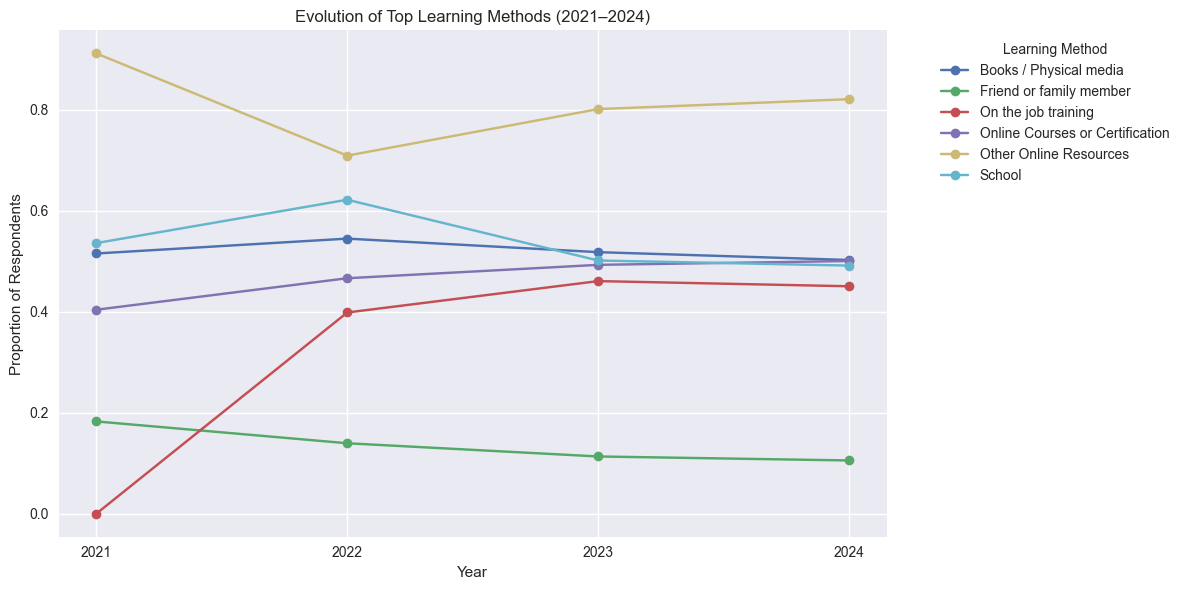

In [6]:
# Select relevant columns from 2021–2024 for LearnCode analysis
learncode_dfs = []
for year in range(2021, 2025):
    if year in survey_data and 'LearnCode' in survey_data[year].columns:
        df = survey_data[year][['LearnCode', 'Year']].copy()
        learncode_dfs.append(df)

# Combine only the selected data
learncode_data = pd.concat(learncode_dfs, ignore_index=True)

# Clean LearnCode column
learncode_data['LearnCode'] = clean_categorical_column(learncode_data, 'LearnCode', fill_value='Unknown')

# Drop rows with 'Unknown' LearnCode (optional, depending on analysis needs)
learncode_data = learncode_data[learncode_data['LearnCode'] != 'Unknown']

# Harmonize learning method entries
learning_method_mapping = {
    "Other online resources (e.g., videos, blogs, forum)": "Other Online Resources",
    "Other online resources (ex: videos, blogs, etc., online community)": "Other Online Resources",
    "School (i.e., University, College, etc)": "School",
    "Online Forum": "Other Online Resources",
    "Other online resources (e.g., videos, blogs, forum, online community)": "Other Online Resources",
    "Other online resources (ex: videos, blogs, etc)": "Other Online Resources",
    "Colleague": "On the Job Training"
}

# Split and explode LearnCode
learncode_data['LearnCode'] = learncode_data['LearnCode'].str.split(';')
exploded_data = learncode_data.explode('LearnCode')
exploded_data['LearnCode'] = exploded_data['LearnCode'].replace(learning_method_mapping)

# Calculate proportions
respondents_per_year = learncode_data.groupby('Year').size().reset_index(name='total_respondents')
method_counts = exploded_data.groupby(['Year', 'LearnCode']).size().reset_index(name='count')
method_counts = method_counts.merge(respondents_per_year, on='Year')
method_counts['proportion'] = method_counts['count'] / method_counts['total_respondents']

# Identify top methods and plot
top_methods = method_counts.groupby('Year').apply(lambda x: x.nlargest(5, 'proportion')).reset_index(drop=True)
unique_top_methods = top_methods['LearnCode'].unique()
filtered_data = method_counts[method_counts['LearnCode'].isin(unique_top_methods)]
pivot_data = filtered_data.pivot(index='Year', columns='LearnCode', values='proportion').fillna(0)

# Plot
pivot_data.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Evolution of Top Learning Methods (2021–2024)')
plt.xlabel('Year')
plt.ylabel('Proportion of Respondents')
plt.legend(title='Learning Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(range(2021, 2025))
plt.tight_layout()
plt.show()

### Question2: How has the popularity of well-known programming languages evolved over time?



In [7]:
# target column
# 2021 -2024 : LanguageHaveWorkedWith
# 2020 - 2018 :  LanguageWorkedWith
# 2017 'HaveWorkedLanguage'

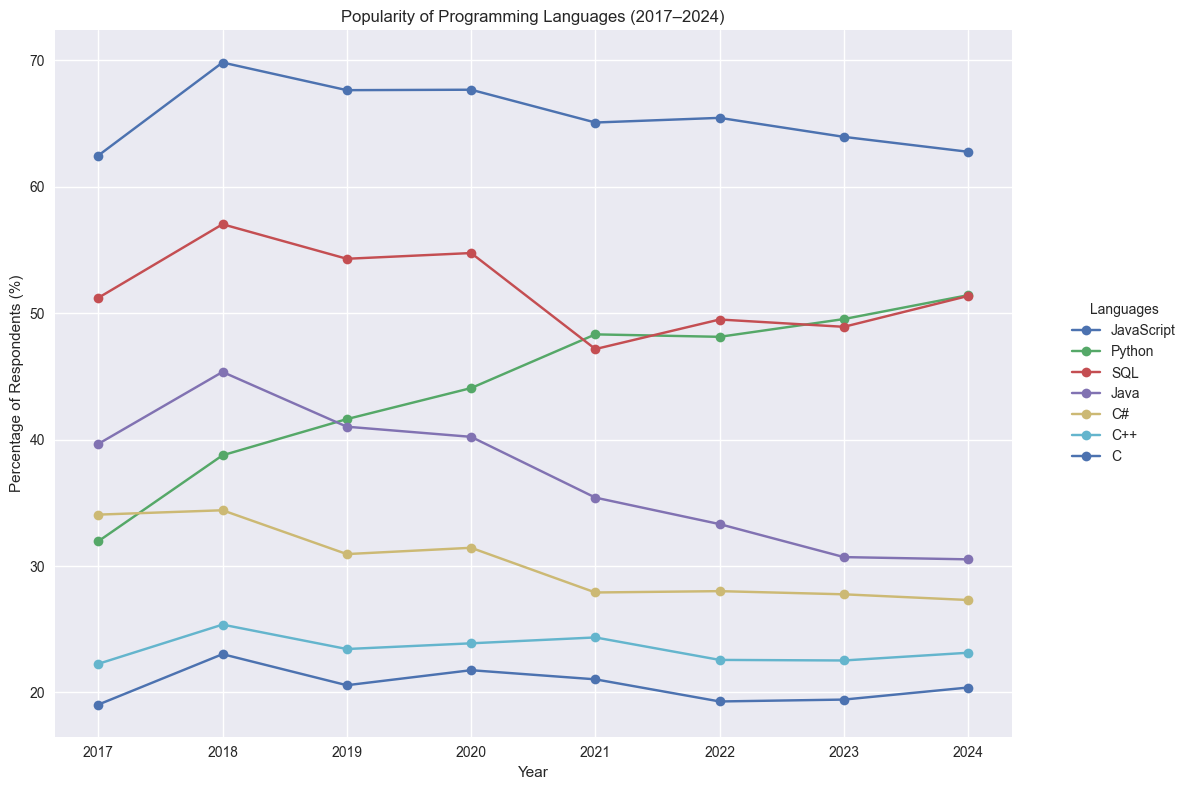

In [8]:
def get_language_column(year):
    """
    Determine the language column name based on the survey year.

    Parameters:
    - year (int): Survey year.

    Returns:
    - str: Name of the language column for that year.
    """
    if year == 2017:
        return 'HaveWorkedLanguage'
    elif 2018 <= year <= 2020:
        return 'LanguageWorkedWith'
    else:  # 2021–2024
        return 'LanguageHaveWorkedWith'

def calculate_language_percentages(df, lang_column, target_languages):
    """
    Calculate the percentage of respondents using each programming language.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - lang_column (str): Column containing language data.
    - target_languages (list): List of languages to analyze.

    Returns:
    - dict: Language percentages.
    """
    if lang_column not in df.columns:
        return {lang: 0 for lang in target_languages}  # Return 0% if column missing
    lang_list = df[lang_column].dropna().str.split(';').apply(lambda x: [l.strip() for l in x])
    total_respondents = len(lang_list)
    if total_respondents == 0:
        return {lang: 0 for lang in target_languages}
    return {lang: (lang_list.apply(lambda x: lang in x).sum() / total_respondents * 100) 
            for lang in target_languages}

# Define languages to analyze
languages = ['JavaScript', 'Python', 'SQL', 'Java', 'C#', 'C++', 'C']

# Calculate language percentages for each year
language_data = {
    year: calculate_language_percentages(survey_data[year], get_language_column(year), languages)
    for year in range(2017, 2025) if year in survey_data
}

# Create DataFrame and plot
popularity_df = pd.DataFrame(language_data).T
plt.figure(figsize=(12, 8))
for lang in languages:
    plt.plot(popularity_df.index, popularity_df[lang], marker='o', label=lang)
plt.title('Popularity of Programming Languages (2017–2024)')
plt.xlabel('Year')
plt.ylabel('Percentage of Respondents (%)')
plt.legend(title='Languages', bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.grid(True)
plt.xticks(range(2017, 2025))
plt.tight_layout()
plt.show()

### Question3 How does the adoption of AI vary across different age groups in 2024?

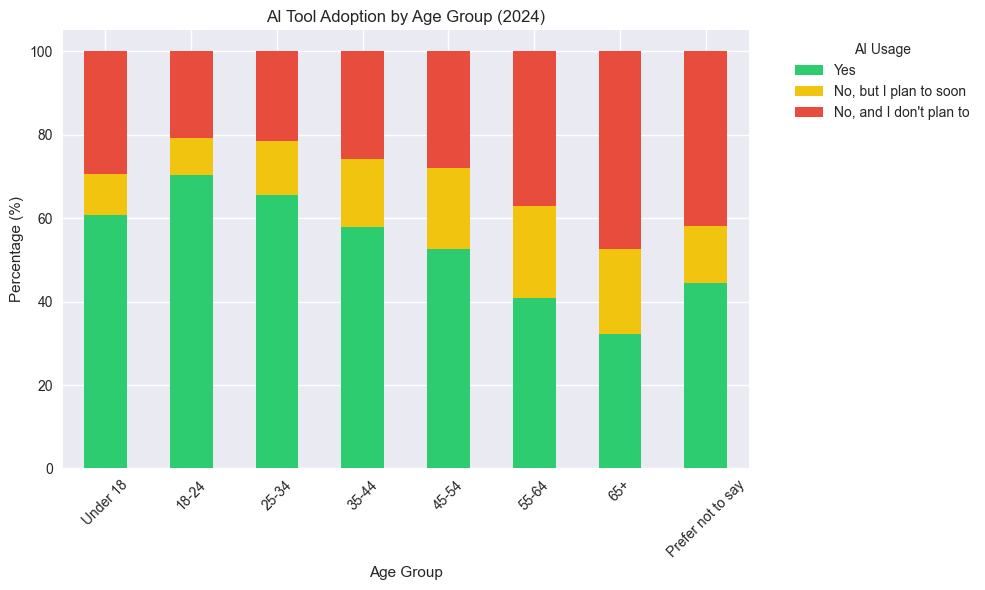

In [9]:


# Access and copy 2024 data
results_2024 = survey_data[2024].copy()

# Clean Age column
results_2024['age_clean'] = results_2024['Age'].replace({
    'Under 18 years old': 'Under 18', 
    '18-24 years old': '18-24', 
    '25-34 years old': '25-34',
    '35-44 years old': '35-44', 
    '45-54 years old': '45-54', 
    '55-64 years old': '55-64',
    '65 years or older': '65+', 
    'Prefer not to say': 'Prefer not to say'
})

# Create crosstab of AI adoption by age group
ai_adoption_by_age = pd.crosstab(results_2024['age_clean'], results_2024['AISelect'], normalize='index') * 100

# Define order for plotting
age_order = ['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+', 'Prefer not to say']
ai_select_order = ['Yes', 'No, but I plan to soon', 'No, and I don\'t plan to']
ai_adoption_by_age = ai_adoption_by_age.loc[age_order, ai_select_order]

# Plot stacked bar chart
ai_adoption_by_age.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#2ecc71', '#f1c40f', '#e74c3c'])
plt.title('AI Tool Adoption by Age Group (2024)')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.legend(title='AI Usage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Question 4 : What are the most significant challenges for users utilizing AI code assistants or GenAI tools?


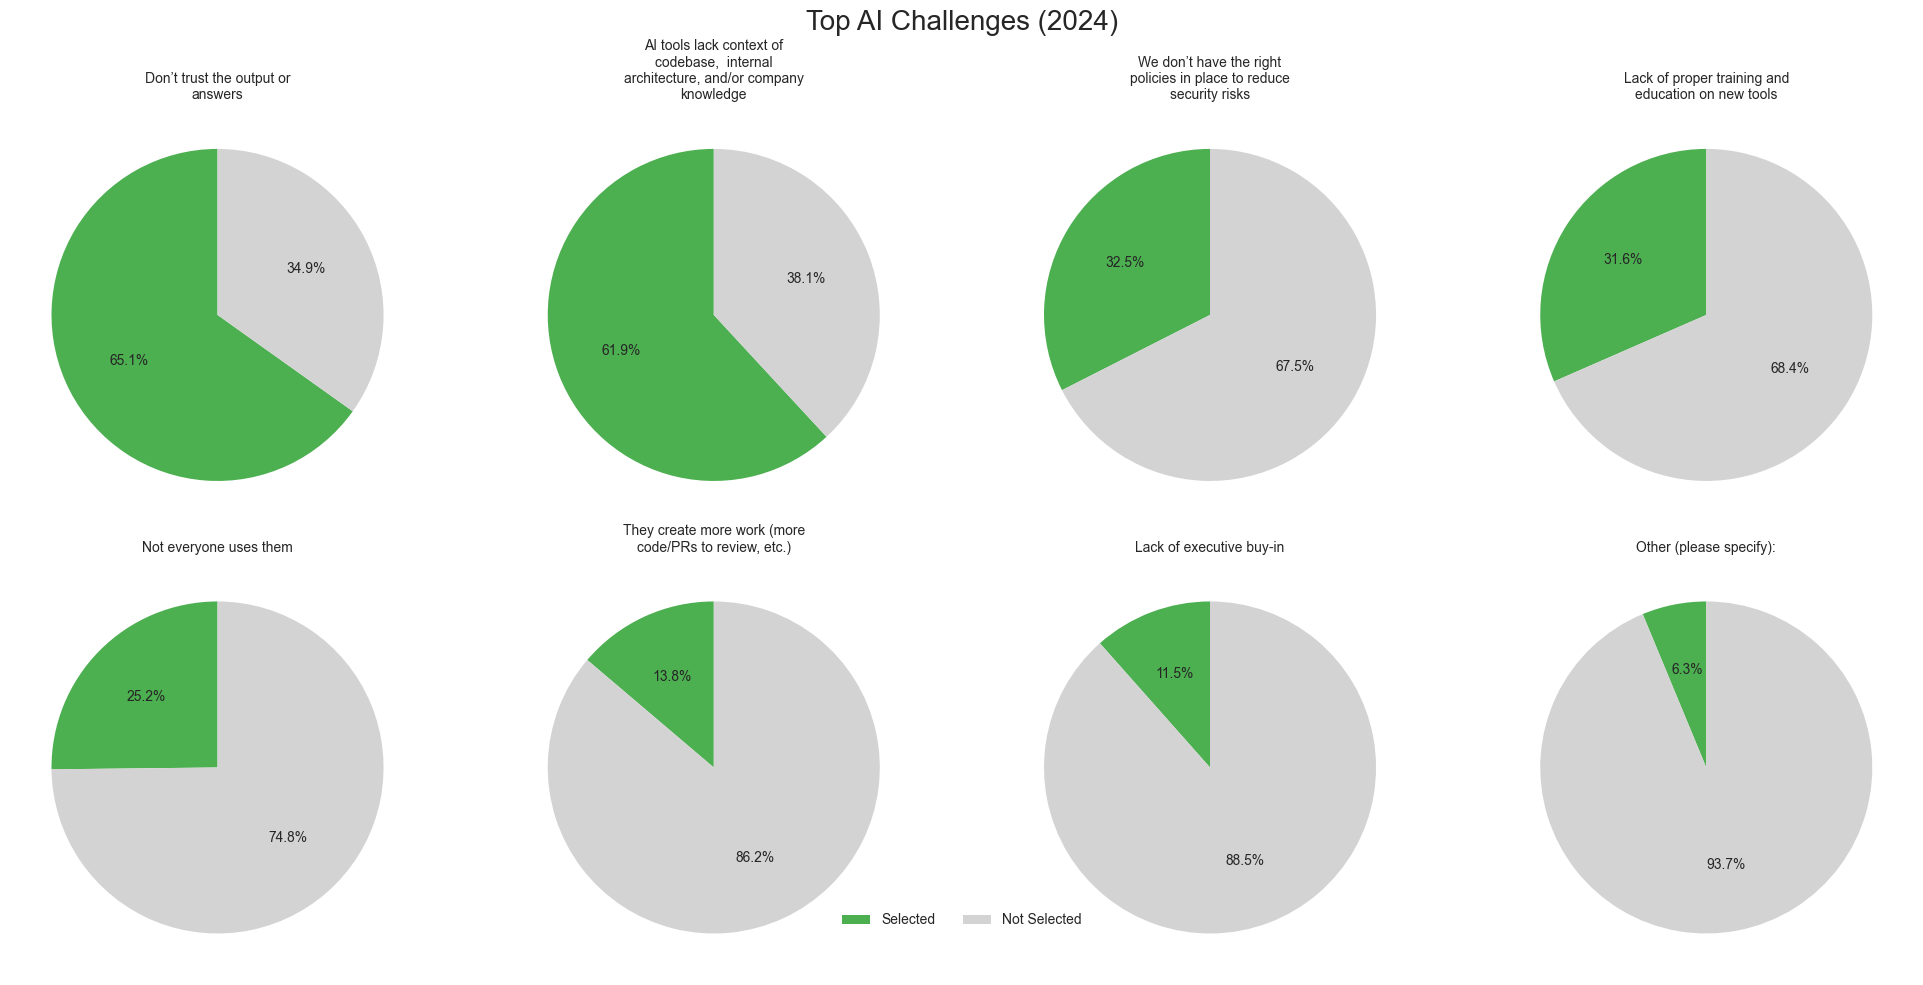

In [11]:

# Access and copy 2024 data for AI challenges
challenge_data = survey_data[2024][['AIChallenges']].copy()
challenge_data['AIChallenges'] = challenge_data['AIChallenges'].fillna('None')
total_respondents = challenge_data[challenge_data['AIChallenges'] != 'None'].shape[0]

# Explode and count challenges
challenge_data['AIChallenges'] = challenge_data['AIChallenges'].str.split(';')
exploded_challenges = challenge_data.explode('AIChallenges')
exploded_challenges = exploded_challenges[exploded_challenges['AIChallenges'] != 'None']
challenge_counts = exploded_challenges['AIChallenges'].value_counts()[:8]

# Plot pie charts for top 8 challenges
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()
colors = ['#4CAF50', '#D3D3D3']  # Green for Selected, Gray for Not Selected

for i, challenge in enumerate(challenge_counts.index):
    selected = challenge_counts[challenge]
    sizes = [selected, total_respondents - selected]
    axes[i].pie(sizes, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
    axes[i].set_title(textwrap.fill(challenge, width=30), fontsize=10)

# Add legend and title
# Define handles and labels separately
handles = [
    Patch(facecolor='#4CAF50'),
    Patch(facecolor='#D3D3D3')
]
labels = ['Selected', 'Not Selected']
# Add the legend with both arguments
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0.05), ncol=2)
fig.suptitle('Top AI Challenges (2024)', fontsize=20)
plt.tight_layout()
plt.show()